
CUSTOMER SEGMENTATION – CLUSTERING ANALYSIS

PROBLEM: Understand the target customers for the marketing team to plan a strategy

CONTEXT: Your manager wants you to identify the most important shopping groups based on income, age, and the store shopping score. He want the ideal number of groups and a label for each of them.

OBJECTIVE: Divide the store target market into approachable groups. Create a subset of the market based on demographics and behavioral criteria to better understand the target for marketing activities

In [110]:
## Import libraries 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [111]:
## Read data
df = pd.read_excel("/Users/Admin/Portfolio/Cluster\ Analysis/Retail_Store.xlsx")

In [112]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [113]:
df.shape

(200, 5)

In [114]:
## Data cleaning
df.isnull().sum() #check missing data

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There is no missing data

In [115]:
df.duplicated().sum() #check duplicate data 

0

No duplicate data found

In [116]:
print (df.dtypes) #check data type

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [117]:
df.rename(columns={'Genre':'Gender'}, inplace=True) # rename Genre as Gender

In [118]:
df # Check df again

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [119]:
## Exploratory Data Analysis (EDA)
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Annual income and spending score has somewhat of a normal distribution since its mean and median are really close.

Customers have avg age of 40 years old, with $60k/year. 

In [120]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

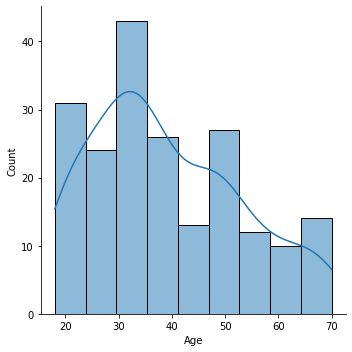

<Figure size 432x288 with 0 Axes>

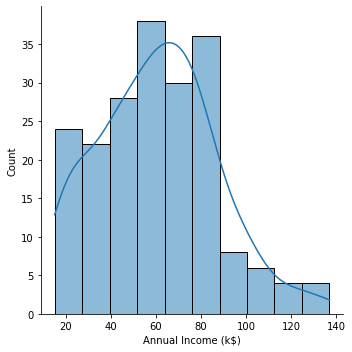

<Figure size 432x288 with 0 Axes>

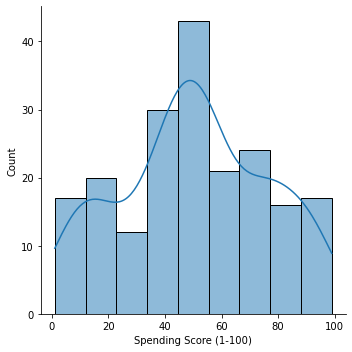

In [121]:
# Distribution of each variable
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:   
    plt.figure()   
    sns.displot(df[i],kde=True); 

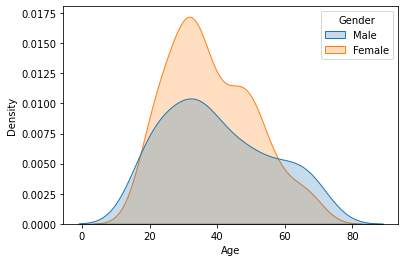

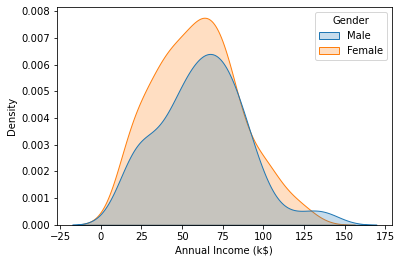

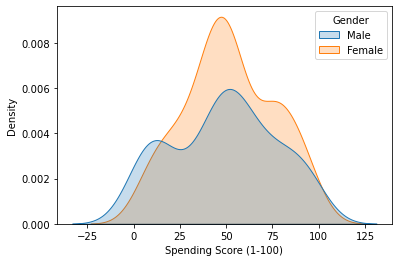

In [122]:
# Distributions by gender using kdeplot
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:  
    plt.figure()   
    sns.kdeplot(df[i], shade=True,hue=df['Gender']);

From the aboves plots, generally,women have more frequency in "Age", "Annual Income" and "Spending Score"

In [123]:
# Mean of variables by gender

df.groupby(['Gender'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

/var/folders/51/45hcv7jn2_9frxzxjbjfk2tc0000gn/T/ipykernel_36012/4157121162.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Gender'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


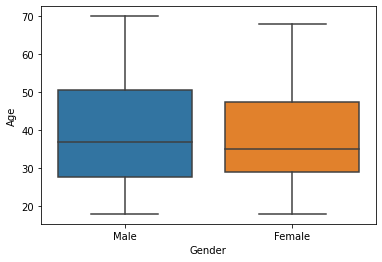

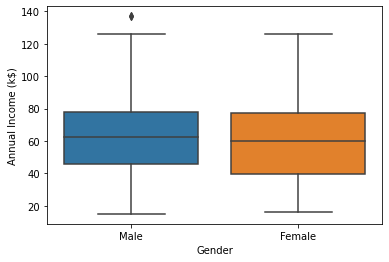

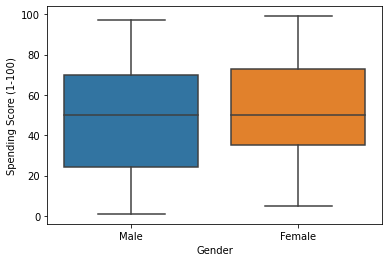

In [124]:
# Outliers and percentiles using boxplot 
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:   
    plt.figure()    
    sns.boxplot(data=df, x='Gender',y=df[i]);

In [125]:
# Correlation between variables
df.corr(method='pearson')

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


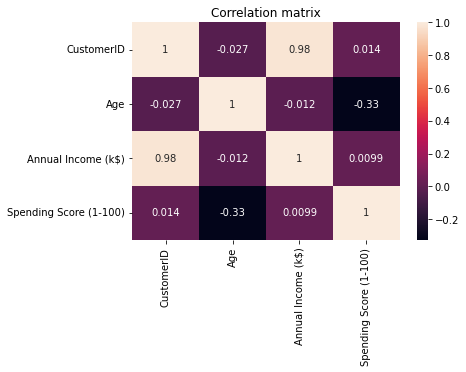

In [126]:
# Visualize by heatmap
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix")

plt.show()

Generally, there is no correlations between "Age", "Annual Income", and "Spending Score" in this dataset (value < 0.5)

CLUSTERING - UNIVARIATE AND BIVARIATE

In [127]:
##Univariate clustering (Annual income)

clustering1 = KMeans() #The standard parameters for clusters in this algorithm is 8.

In [128]:
clustering1.fit(df[['Annual Income (k$)']]) #Fit into df

KMeans()

In [129]:
clustering1.labels_ #Label list 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5,
       5, 5], dtype=int32)

In [130]:
df['Income Cluster']=clustering1.labels_ #Compare labels within df
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,5
196,197,Female,45,126,28,5
197,198,Male,32,126,74,5
198,199,Male,32,137,18,5


In [131]:
df['Income Cluster'].value_counts() #The number of customers in each clusters

3    42
0    36
1    32
4    28
6    26
7    16
2    14
5     6
Name: Income Cluster, dtype: int64

Rather than using a default clustering number, the elbow method can be used to find the optimal number of clusters.

In [132]:
# ELBOW METHOD
# Check the inertia (WCSS) on each cluster
inertia_scores=[]    
for i in range(1,11):  
    kmeans=KMeans(n_clusters=i) 
    kmeans.fit(df[['Annual Income (k$)']])  
    inertia_scores.append(kmeans.inertia_) 

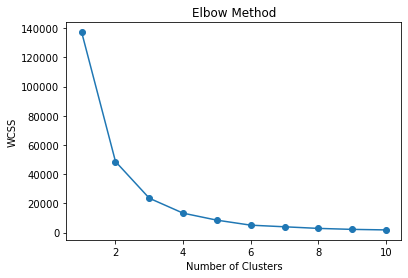

In [133]:
#Pair the inertia scores with their respective clusters
plt.plot(range(1,11), inertia_scores, marker='o')
plt.title('Elbow Method')
plt.ylabel("WCSS")
plt.xlabel('Number of Clusters')
plt.show()

It seems 3 is the optimal number of clusters. If unsure, the KneeLocater function from the Kneed Library can be used.

In [134]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [135]:
from kneed import KneeLocator

k1=KneeLocator(range(1,11), inertia_scores, curve='convex', direction='decreasing')
k1.elbow

3

Here it is, the optimal no. of cluster is 3

In [136]:
# Now k-mean analysis can be runned with k=3
kmeans1=KMeans(n_clusters=3)
kmeans1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [137]:
# Adjust "Income cluster" column created before with k as defaut
df['Income Cluster']=kmeans1.labels_
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,2
197,198,Male,32,126,74,2
198,199,Male,32,137,18,2


In [138]:
df['Income Cluster'].value_counts() #The number of customers in each clusters

1    92
0    72
2    36
Name: Income Cluster, dtype: int64

In [139]:
#Mean for variables in each cluster
df.groupby('Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

/var/folders/51/45hcv7jn2_9frxzxjbjfk2tc0000gn/T/ipykernel_36012/1335595960.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.930556,33.027778,50.166667
1,39.184783,66.717391,50.054348
2,37.833333,99.888889,50.638889


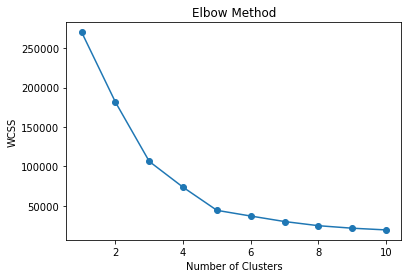

In [140]:
## BIVARIATE CLUSTERING (Annual Income & Spending Score)
# ELBOW METHOD

inertia_scores2=[]    
for i in range(1,11):   
    kmeans2=KMeans(n_clusters=i) 
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']]) 
    inertia_scores2.append(kmeans2.inertia_)   
    
plt.plot(range(1,11), inertia_scores2, marker='o')
plt.title('Elbow Method')
plt.ylabel("WCSS")
plt.xlabel('Number of Clusters')
plt.show()

In [141]:
k2=KneeLocator(range(1,11), inertia_scores2, curve='convex', direction='decreasing')
k2.elbow

5

In [142]:
kmeans2=KMeans(n_clusters=5) # 5 cluster is optimal
kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Income & Spending Cluster']=kmeans2.labels_
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income & Spending Cluster
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,1
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,2
196,197,Female,45,126,28,2,3
197,198,Male,32,126,74,2,2
198,199,Male,32,137,18,2,3


In [143]:
#Get the centriods for each cluster
kmeans2.cluster_centers_

array([[55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636]])

In [144]:
#Make df the centriods into a scatter plot
centers=pd.DataFrame(kmeans2.cluster_centers_)
centers.columns=['x','y']
centers

,x,y
0,55.296296,49.518519
1,26.304348,20.913043
2,86.538462,82.128205
3,88.200000,17.114286
4,25.727273,79.363636


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

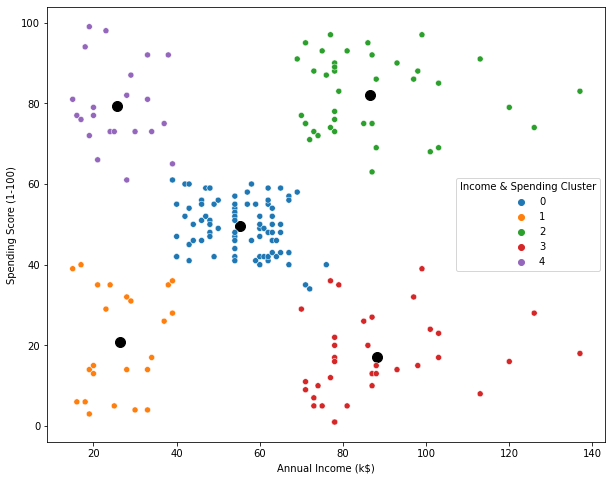

In [145]:
# Plot clustering result
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'], s=100, c='black')
sns.scatterplot(data=df, x='Annual Income (k$)',
                y='Spending Score (1-100)',hue='Income & Spending Cluster',palette='tab10')

From the above graph, 5 clusters are created. Different marketing strategies could be promoted for each cluster. 

1. "Green" cluster. This consumer cluster has high income and high spending score, they should be the target group of the business.

2. "Purple" cluster includes consumers having high income but don't spend alot. More researchs should be done on the reasons for this low score. It could be "Product availability", or "Customer Services"?! Let's look deeper before planning a marketing strategy for this group. 

3. and more

Now, we will see more socio-economic variable for each cluster, this helps to understand our target consumers and create better strategies.

In [146]:
## Further analysis
# Crosstab to breakdown results by gender 
pd.crosstab(df['Income & Spending Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Income & Spending Cluster,,
0,0.592593,0.407407
1,0.608696,0.391304
2,0.538462,0.461538
3,0.457143,0.542857
4,0.590909,0.409091


In [147]:
# Mean by each variable
df.groupby('Income & Spending Cluster')['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

/var/folders/51/45hcv7jn2_9frxzxjbjfk2tc0000gn/T/ipykernel_36012/1818642604.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Income & Spending Cluster')['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Income & Spending Cluster,,,
0,42.716049,55.296296,49.518519
1,45.217391,26.304348,20.913043
2,32.692308,86.538462,82.128205
3,41.114286,88.200000,17.114286
4,25.272727,25.727273,79.363636
